In [2]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import SimpleITK as sitk
import tifffile as tif
import seaborn as sns
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe/")
from tools.analysis.transform_points import transform_points

In [26]:
basepath = "/home/emilyjanedennis/Desktop/brains/"

brains = ["z269_ch01","z268_ch00","z268_ch01","z267_ch00","z266_ch00","z265_ch00"]

for brain in brains:
    csv_filename = '/home/emilyjanedennis/Desktop/brains/{}/{}_counts_SIGMA_50eroded.csv'.format(brain[0:4],brain)
    data = pd.read_csv(csv_filename)
    data.insert(6,"brainname",brain)
    if brain == brains[0]:
        alldata = data
    else:
        alldata = pd.concat([alldata,data])
        
# SIGMA annotations 
annotation_labels = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/labels/SIGMA_labels.csv"
alldata.to_csv('/home/emilyjanedennis/Desktop/alldata.csv')

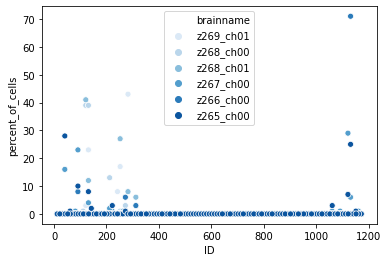

In [23]:
sns.set_palette("Blues")
ax = sns.scatterplot(x='ID',y='percent_of_cells',data=alldata,hue='brainname')
plt.show()


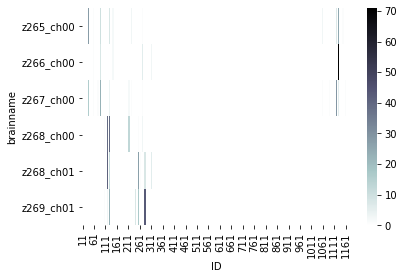

In [24]:

hm_data = alldata.pivot(index="brainname",columns='ID',values='percent_of_cells')

plt.show(sns.heatmap(hm_data,cmap="bone_r"))
